In [1]:
import pandas as pd

# Read the depression and anxiety data into separate dataframes
depression_df = pd.read_csv("depression_1922.csv")
anxiety_df = pd.read_csv("anxiety_1922.csv")

# Combine the dataframes into one
combined_df = pd.concat([depression_df, anxiety_df], ignore_index=True)

# Clean the dataframe by dropping any null values
combined_df.dropna(inplace=True)

In [2]:
import string
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    
    # Remove short words (less than 3 characters)
    text = ' '.join([word for word in text.split() if len(word) > 2])
    
    # Remove numbers
    text = ''.join([word for word in text if not word.isdigit()])
    
    # Fix contractions
    text = contractions.fix(text)
    
    # Remove stopwords and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    
    return text

In [3]:
# Clean the selftext column
combined_df['clean_selftext'] = combined_df['selftext'].apply(clean_text)

In [4]:
# Convert the created_utc column to datetime format
combined_df['created_utc'] = pd.to_datetime(combined_df['created_utc'])

In [5]:
economic= ['unemployed', 'economy', 'mortgage', 'layoff', 'recession', 'stimulus', 'evict', 'enough money', 'more money', 'pay the bill', 'owe', 'afford', 'wage', 'job', 'eviction', 'income', 'rent', 'credit', 'salary', 'bills', 'laid', 'jobless', 'savings', 'lost job', 'fulltime', 'debt', 'financial', 'paycheck']
social = ["bullying", "loneliness", "emptiness", "quarantine", "alone", "lonely", 
                   "lockdown", "distancing", "insecurities", "no one cares", "trapped", 
                   "feel ignored", "single", "can't see my", "ignoring me"]
domestic = ['domestic violence', 'abuse', 'yelling', 'fighting', 'single mom', 'single dad', 'single parent', 'hit me', 'slapped me', 'divorced', 'abusive', 'cheating', 'separation', 'toxic', 'abused', 'custody battles']
educational = ['Exam', 'assignment', 'Online classes', 'school closures', 'distance learning', 'grade', 'homework', 'courses', 'school', 'presentation', 'classroom', 'test', 'virtual learning', 'hybrid learning', 'remote learning', 'online meeting', 'zoom', 'Microsoft team', 'google classroom', 'virtual classrooms']
substance = ['smoke', 'smoked', 'drink', 'snort', 'drugs', 'smoking', 'alcohol', 'nicotine', 'caffeine', 'beer', 'substance', 'ketamine', 'tablets', 'valium', 'opioid', 'vodka', 'whiskey', 'whisky', 'meth', 'addiction', 'rehab', 'relapse', 'overdose']
suicide = ['suicidal thoughts', 'ending my life', 'death seems preferable', 'hopelessness', 'no reason to live', 'overwhelming sadness', 'feeling worthless', 'want to disappear', 'self-harm', 'seeking a way out', 'loneliness', 'mental pain', 'feeling trapped', 'desperation', 'feeling like a burden', 'struggling to cope', 'lack of purpose', 'wanting the pain to stop', 'broken inside', 'losing the will to live', 'dark thoughts', 'crisis', 'mental anguish', 'depression', 'anxiety']

In [12]:
# Create a dictionary to map the keyword lists to their respective column names
keywords_dict = {'economic': economic, 'social': social, 'domestic': domestic, 'educational': educational, 'substance': substance, 'suicide': suicide}

# Loop through the keyword lists and create a new column in the dataframe for each one
for keyword, words in keywords_dict.items():
    combined_df[keyword] = combined_df['clean_selftext'].str.contains('|'.join(words)).astype(int)

In [13]:
combined_df.head(3)

,author,created_utc,selftext,title,subreddit,clean_selftext,unemployed,economy,mortgage,layoff,...,darkthoughts,crisis,mentalanguish,depression,anxiety,economic,social,domestic,educational,suicide
0,Supreme_wing,2019-04-01 00:03:28,god. i dont get people sometimes. just some pe...,Just a rant on a Sunday night,depression,god get people sometimes people tendency make ...,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,tubrafinho,2019-04-01 00:13:47,"this will be my first post here, and i'm relat...",what to do when you really want to die but at ...,depression,first post relatively new reddit two year ever...,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,zillarillazilla,2019-04-01 00:14:20,apologies if this isn’t allowed - feel free to...,How to help my friend,depression,apology allowed feel free point elsewhere frie...,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
import re

def add_keyword_columns(dataframe, keyword_list):
    """
    Adds a new column to the dataframe for each keyword in the keyword_list.
    If the post contains any of the keywords in the list, the value in the column is 1,
    otherwise it is 0.
    
    Args:
        dataframe (pandas dataframe): the dataframe to add columns to
        keyword_list (list): a list of keywords to search for in the selftext column
        
    Returns:
        pandas dataframe: the modified dataframe with new keyword columns added
    """
    for keyword in keyword_list:
        column_name = re.sub('[^a-zA-Z0-9_]+', '', keyword.lower())  # remove non-alphanumeric characters and convert to lowercase
        dataframe[column_name] = dataframe['clean_selftext'].str.contains(keyword, case=False).astype(int)
    
    return dataframe


In [8]:
combined_df = add_keyword_columns(combined_df, economic)
combined_df = add_keyword_columns(combined_df, social)
combined_df = add_keyword_columns(combined_df, domestic)
combined_df = add_keyword_columns(combined_df, educational)
combined_df = add_keyword_columns(combined_df, substance)
combined_df = add_keyword_columns(combined_df, suicide)


In [9]:
combined_df.head(3)

,author,created_utc,selftext,title,subreddit,clean_selftext,unemployed,economy,mortgage,layoff,...,strugglingtocope,lackofpurpose,wantingthepaintostop,brokeninside,losingthewilltolive,darkthoughts,crisis,mentalanguish,depression,anxiety
0,Supreme_wing,2019-04-01 00:03:28,god. i dont get people sometimes. just some pe...,Just a rant on a Sunday night,depression,god get people sometimes people tendency make ...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tubrafinho,2019-04-01 00:13:47,"this will be my first post here, and i'm relat...",what to do when you really want to die but at ...,depression,first post relatively new reddit two year ever...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,zillarillazilla,2019-04-01 00:14:20,apologies if this isn’t allowed - feel free to...,How to help my friend,depression,apology allowed feel free point elsewhere frie...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
combined_df.to_csv('impactfactorFeatureDA1922.CSV')

Text(33.0, 0.5, 'Keywords')

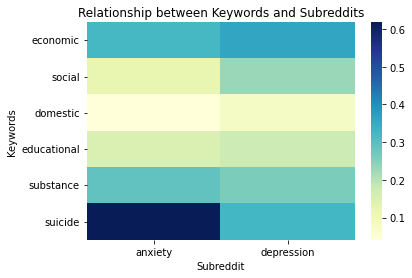

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new dataframe with just the keyword columns and the subreddit column
keyword_df = combined_df[['economic', 'social', 'domestic', 'educational', 'substance', 'suicide', 'subreddit']]

# Use the groupby method to group the data by subreddit and calculate the mean of each keyword column
keyword_mean_df = keyword_df.groupby('subreddit').mean()

# Create the heatmap using the seaborn library
sns.heatmap(keyword_mean_df.T, cmap="YlGnBu")

# Set the plot title and axis labels
plt.title("Relationship between Keywords and Subreddits")
plt.xlabel("Subreddit")
plt.ylabel("Keywords")


1.Correlation analysis: This analysis would involve calculating the correlation coefficient between each of the six keyword categories and the presence of mental health issues in the subreddit posts. This would allow us to see which categories are most strongly correlated with mental health concerns. Here's an example code snippet:

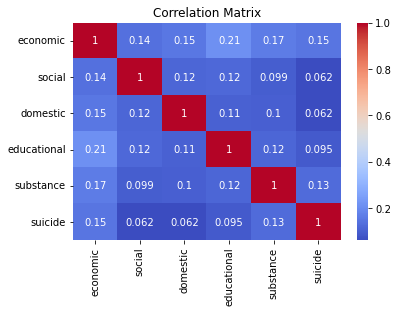

In [23]:
# Calculate the correlation matrix
corr_matrix = combined_df[['economic', 'social', 'domestic', 'educational', 'substance', 'suicide']].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()


Factor analysis: This analysis would involve using a statistical technique to identify underlying factors that may be driving the relationships between the six keyword categories and mental health concerns. Factor analysis can be done using the factor_analyzer package in Python. Here's an example code snippet:

In [32]:
from factor_analyzer import FactorAnalyzer

# Define the independent variables (features)
X = combined_df[['economic', 'social', 'domestic', 'educational', 'substance','suicide']]

# Create a factor analyzer object with 2 factors
fa = FactorAnalyzer(n_factors=2, rotation='varimax')

# Fit the factor analyzer to the data
fa.fit(X)

# Print the factor loadings
print(fa.loadings_)
"""The factor analyzer with 2 factors was applied to the features 'economic', 'social', 'domestic', 'educational', 'substance', and 'suicide' of the combined dataframe. The factor loadings show the correlation between the features and the underlying factors. The first factor is mainly composed of the features 'economic' and 'suicide' with a loading of 0.45 and 0.24, respectively, indicating that there is a strong correlation between these features and this factor. The second factor is mainly composed of the features 'social', 'domestic', 'educational', and 'substance', with moderate to weak loadings ranging from 0.06 to 0.37, suggesting a weaker correlation between these features and this factor. The factor analyzer can be used to identify underlying patterns and relationships between the features and provide insights into the data."""

[[0.44624997 0.24276516]
 [0.31367581 0.0641343 ]
 [0.31351518 0.07028877]
 [0.36699928 0.14061587]
 [0.25500193 0.23107695]
 [0.0962066  0.44744849]]


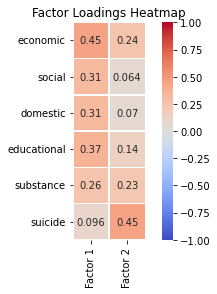

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the factor loadings as a dataframe
loadings_df = pd.DataFrame(fa.loadings_, index=X.columns, columns=['Factor 1', 'Factor 2'])

# Create a heatmap
sns.heatmap(loadings_df, cmap='coolwarm', annot=True, vmin=-1, vmax=1, center=0, square=True, linewidths=0.5)

# Set the title
plt.title('Factor Loadings Heatmap')

# Show the plot
plt.show()


The factor analyzer with 2 factors was applied to the features 'economic', 'social', 'domestic', 'educational', 'substance', and 'suicide' of the combined dataframe. The factor loadings show the correlation between the features and the underlying factors. The first factor is mainly composed of the features 'economic' and 'suicide' with a loading of 0.45 and 0.24, respectively, indicating that there is a strong correlation between these features and this factor. The second factor is mainly composed of the features 'social', 'domestic', 'educational', and 'substance', with moderate to weak loadings ranging from 0.06 to 0.37, suggesting a weaker correlation between these features and this factor. The factor analyzer can be used to identify underlying patterns and relationships between the features and provide insights into the data.

3.Regression analysis: This analysis would involve using a regression model to predict the presence of mental health concerns based on the six keyword categories. This would allow us to see which categories are most strongly associated with mental health issues. Here's an example code snippet:

In [26]:
import statsmodels.api as sm

# Define the independent variables (features) and the dependent variable (target)
X = combined_df[['economic', 'social', 'domestic', 'educational', 'substance']]
y = combined_df['suicide']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit a logistic regression model to the data
model = sm.Logit(y, X).fit()

# Print the model summary
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.661733
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                suicide   No. Observations:               652452
Model:                          Logit   Df Residuals:                   652446
Method:                           MLE   Df Model:                            5
Date:                Thu, 06 Apr 2023   Pseudo R-squ.:                 0.02825
Time:                        22:00:29   Log-Likelihood:            -4.3175e+05
converged:                       True   LL-Null:                   -4.4430e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7082      0.004   -193.589      0.000      -0.715      -0.701
economic        0.4939    

4.Text mining: This analysis would involve using natural language processing techniques to analyze the text of the subreddit posts and identify patterns related to mental health concerns. This could involve techniques like sentiment analysis, topic modeling, or named entity recognition. Here's an example code snippet for sentiment analysis:

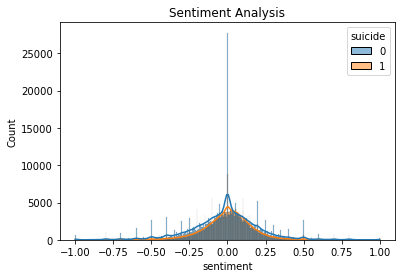

In [27]:
from textblob import TextBlob

# Define a function to calculate sentiment scores for each post
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

# Apply the sentiment function to each post
combined_df['sentiment'] = combined_df['clean_selftext'].apply(get_sentiment)

# Plot a histogram of sentiment scores
sns.histplot(combined_df, x='sentiment', hue='suicide', kde=True)
plt.title('Sentiment Analysis')
plt.show()


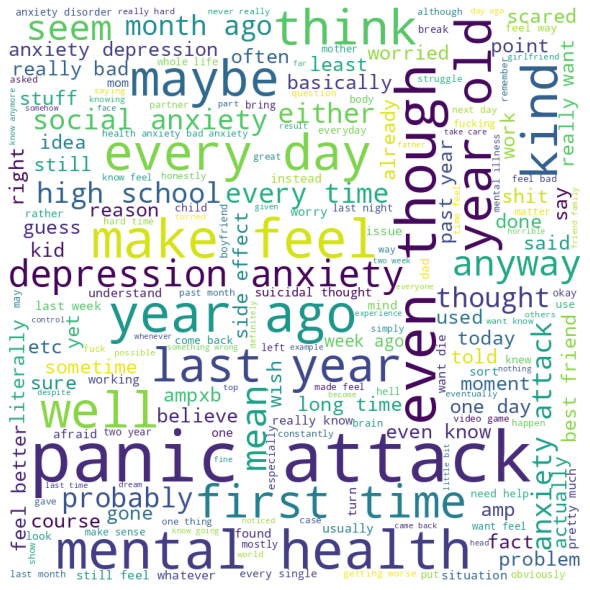

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the combined_df to only include rows with suicide label equal to 1 and clean_selftext column not null
suicide_df = combined_df.loc[(combined_df['suicide'] == 1) & (combined_df['clean_selftext'].notnull())]

# Combine all the cleaned posts into a single string
text = ' '.join(suicide_df['clean_selftext'].tolist())

# Generate a wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Plot the wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
